In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.io import loadmat
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, MaxPool2D, LeakyReLU

In [27]:
joint_name = ['HeadF', 'HeadB', 'HeadL', 'SpineF', 'SpineM', 'SpineL', 
            'Offset1', 'Offset2', 'HipL', 'HipR', 'ElbowL', 'ArmL', 
            'ShoulderL', 'ShoulderR', 'ElbowR', 'ArmR', 'KneeR', 
            'KneeL', 'ShinL', 'ShinR']

joints_idx = [[1, 2], [2, 3], [1, 3], [2, 4], [1, 4], [3, 4], [4, 5], 
            [5, 6], [4, 7], [7, 8], [5, 8], [5, 7], [6, 8], [6, 9], 
            [6, 10], [11, 12], [4, 13], [4, 14], [11, 13], [12, 13], 
            [14, 15], [14, 16], [15, 16], [9, 18], [10, 17], [18, 19], 
            [17, 20]]

In [28]:
# Loading mat file and returning file
def loadMatFile(fileName):
    mat = loadmat('trainTestSplit.mat')[fileName]
    return mat

In [33]:
data_points = loadMatFile('split1True')
head_points = data_points[:, :, 0:3]
print(data_points.shape)
print(head_points.shape)
print(data_points[0].T)
print(head_points[0].T)


(80000, 3, 20)
(80000, 3, 3)
[[-148.32584724    7.45036855   95.17361888]
 [-147.35740925  -12.13259917   98.47824057]
 [-175.85115794  -13.91925855  107.72281218]
 [-167.16889907  -39.74449017   75.65284872]
 [-159.66678183  -65.84279387   93.29262788]
 [-142.62962653 -118.25691954   82.21962152]
 [-186.04472489  -60.53732984   77.79463213]
 [-178.73974191  -95.5538923    86.52594403]
 [-161.69047652 -133.75377288   67.69895397]
 [-119.29809543 -107.25901414   55.75947758]
 [-182.30184109  -51.60205279   20.63139119]
 [-184.45382482  -44.43323849   13.00982509]
 [-187.34977409  -44.03173298   68.2491732 ]
 [-150.82086669  -39.33996224   58.57484858]
 [-150.48590952  -42.87446123   20.81077635]
 [-156.80536485  -34.10066162   10.46731492]
 [-122.13027104  -88.61976976   45.11258056]
 [-179.70972321 -120.73952668   56.3539908 ]
 [-169.96490798 -126.22779069   35.22334471]
 [-119.77641359  -95.02500361   22.09429016]]
[[-148.32584724    7.45036855   95.17361888]
 [-147.35740925  -12.1325

In [59]:
head_distances = []
for i in range(len(head_points)):
    current_head = head_points[0].T
    current_head = np.append(current_head, current_head[0]).reshape(4,3)
    temp_head = []
    for j in range(len(current_head)-1):
        temp_head.append(measureDistance(current_head[j], current_head[j+1]))
    head_distances.append(temp_head)

In [78]:
head_distances = np.array(head_distances)
print(head_distances.shape)
average_dist = np.average(head_distances, axis=0)
max_dist = head_distances.max(axis=0)
min_dist = head_distances.min(axis=0)
print(average_dist)
print(max_dist)
print(min_dist)

(80000, 3)
[19.88343586 30.00913145 37.03762876]
[19.88343586 30.00913145 37.03762876]
[19.88343586 30.00913145 37.03762876]


In [34]:
def measureDistance(a, b):
    x = (a[0] - b[0])
    y = (a[1] - b[1])
    z = (a[2] - b[2])
    return float(np.sqrt(x**2 + y**2 + z**2))

(20, 3, 14)
[[239 244 325 127 133 168 201 212 213 246 258 308 339 352]
 [143 132  94 255 290  22  72 392 146 232 243 349 308  48]
 [336  22 168 191 159 336  46 140 288 339 377  30 395 121]]


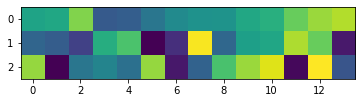

In [160]:
one = np.random.randint(400, size=(20, 20))
two = np.random.randint(400, size=(20, 20))
three = np.random.randint(400, size=(20, 20))
out = []
for i in range(20):
    temp = np.array([one[i], two[i], three[i]])
    first = temp[:,1:4].T
    second = temp[:,3:14]
    second = second [ :, second[0].argsort()]
    first = first [ :, first[0].argsort()]
    output = np.concatenate((first, second), axis =1)
    out.append(output)
out= np.array(out)
print(out.shape)
print(out[1])
plt.imshow(out[1])
plt.show()
# out = []
# for i in range(3, 20):
#     temp = np.array([one[i], two[i], three[i]]).T
#     temp = temp[temp[:,0].argsort()].T
#     out.append(temp)
# out= np.array(out)
# print(out.shape)
# plt.imshow(out[1])


In [163]:
# temp = np.random.randint(60, size=(3, 20))
temp = np.arange(60).reshape(3,20)
print(temp)
temp = temp.reshape((20, -1))
print(temp)


[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]
 [30 31 32]
 [33 34 35]
 [36 37 38]
 [39 40 41]
 [42 43 44]
 [45 46 47]
 [48 49 50]
 [51 52 53]
 [54 55 56]
 [57 58 59]]
